In [111]:
# 导入包  
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator  # x轴刻度的间隔
import seaborn as sns
%config InlineBackend.figure_format = 'retina' # 设置图片清晰度
plt.rcParams['font.sans-serif'] = ['Simsun']   # 指定默认字体 Simsun为宋体
plt.rcParams['axes.unicode_minus'] = False     # 解决保存图像时负号‘-’显示为方块的问题
# from pylab import mpl
# mpl.rcParams['font.size'] = 15                 # 全局图片字体调节为15

import warnings
warnings.filterwarnings("ignore")              # 忽略警告

pd.set_option('display.max_columns', None)    # 显示所有列

In [156]:
pht_ = pd.read_csv('data\主播数据(处理后).csv')
pht_.订阅量.fillna('未知', inplace=True)

In [157]:
pht_.head(2)

,用户id,平均人气,贡献榜总人数,贡献榜总金额,是否有收入,高等级用户数,高等级用户数占比,贵族数,金主数量,贡献榜人均金额,广泛贡献用户数,守护者个数,视频平均时长,视频平均每周更新频率,视频平均点赞数,视频平均评论数,视频平均分享数,视频平均观看次数,公会概况,英雄个数,英雄概况,标签,直播标题主题,公告主题,直播时长_分箱,活跃时间,是否蓝光,蓝光清晰度,区域,是否为前线城市,性别,订阅量,个人等级,主播等级,贡献榜平均用户等级
0,2456843900,18115.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.8,0.416667,0.0,0.0,0.2,560.2,无公会,1,热门上单,上电视,高段开黑,缺少信息,"(-1, 2]",非黄金时,1,4M以下,西北,1.0,1.0,未知,1.0,17.0,0.0
1,1279528989523,18132.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,无公会,0,未知,上电视,低段娱乐,缺少信息,"(-1, 2]",黄金时段,1,4M以下,华南,0.0,1.0,未知,11.0,4.0,0.0


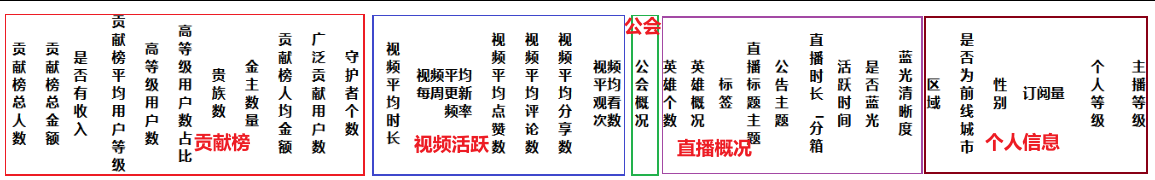

In [158]:
# 生成虚拟变量
dummies_columns = ['公会概况','英雄概况','是否有收入','标签','直播标题主题','公告主题','直播时长_分箱','活跃时间','是否蓝光','蓝光清晰度','性别','订阅量', '区域','是否为前线城市']
pht = pd.get_dummies(pht_, columns=dummies_columns)

#### 初步做一个逻辑回归

In [179]:
X = pht[['是否有收入_1', '贡献榜总人数', '贡献榜总金额', '贡献榜平均用户等级', '高等级用户数',
       '高等级用户数占比', '贵族数', '金主数量', '贡献榜人均金额', '广泛贡献用户数', '守护者个数', '视频平均时长',
       '视频平均每周更新频率', '视频平均点赞数', '视频平均评论数', '视频平均分享数', '视频平均观看次数', '个人等级', '主播等级','英雄个数',
       # 公会概况基准值：无公会
       '公会概况_白金中规模公会', '公会概况_白金小规模公会', '公会概况_钻石中规模公会', '公会概况_钻石大规模公会', '公会概况_钻石小规模公会',
       # 英雄概况基准值：未知
       '英雄概况_热门上单', '英雄概况_热门下路','英雄概况_热门打野', '英雄概况_热门辅助', '英雄概况_非热门上单', '英雄概况_非热门下路', '英雄概况_非热门中单','英雄概况_非热门打野', '英雄概况_非热门辅助',
       # 标签基准值：无标签
       '标签_上电视', '标签_大神推荐', '标签_超粉之星', '标签_魅力新星', 
       # 直播标题主题基准值：低段娱乐； 公告主题基准值：缺少信息
       '直播标题主题_高段开黑','公告主题_新人求订阅', '公告主题_时段&粉丝机制', '公告主题_能力描述',
       # 直播时长基准值： (-1, 2]；     活跃时间基准值：非黄金时段；   是否蓝光基准值：否
       '直播时长_分箱_(2, 6]', '直播时长_分箱_(6, 25]', '活跃时间_黄金时段', '是否蓝光_1',
       # 蓝光清晰度基准值：4M以下；     性别基准值：女（性别==2）；    订阅量基准值：15以下
       '蓝光清晰度_4M以上', '性别_1.0', '订阅量_15-60', '订阅量_60-700', '订阅量_700以上', '订阅量_未知',
       # 区域基准值：西北；             
       '区域_东北', '区域_华东', '区域_华中', '区域_华北', '区域_华南', '区域_未知', '区域_海外', '区域_西南', 
       # 是否为前线城市基准值：否
       '是否为前线城市_1.0']]
X.insert(0, 'constant',1)
Y = pht.平均人气

In [180]:
ols = sm.OLS(Y, X)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   平均人气   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     49.40
Date:                Sun, 10 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:40:31   Log-Likelihood:                -91311.
No. Observations:                9387   AIC:                         1.827e+05
Df Residuals:                    9325   BIC:                         1.832e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant         2.672e+04    409.793     65.199      0.000    2.59e+04    2.75e+04
是否有收入_1           227.7132    254.563      0.895      0.371    -271.285     726.711
贡献榜总人数            103.7505     32.564      3.186      0.001      39.918     167.583
贡献榜总金额             -0.0019      0.001     -3.432      0.001      -0.003      -0.001
贡献榜平均用户等级          70.0120     32.188      2.175      0.030       6.917     133.107
高等级用户数            391.0465    151.561      2.580      0.010      93.954     688.138
高等级用户数占比        -1569.0574    725.340     -2.163      0.031   -2990.881    -147.233
贵族数              -132.0743     75.712     -1.744      0.081    -280.487      16.338
金主数量              781.6744    182.710      4.278      0.000     423.522    1139.827
贡献榜人均金额            -0.0005      0.002     -0.196      0.845      -0.005       0.004
广泛贡献用户数           -98.7380     72.359     -1.365      0.172    -240.578      43.102
守护者个数           -1215.0183    753.026     -1.614      0.107   -2691.114     261.077
视频平均时长              0.0938      0.098      0.958      0.338      -0.098       0.286
视频平均每周更新频率         33.6425     39.076      0.861      0.389     -42.955     110.240
视频平均点赞数           130.8403     36.012      3.633      0.000      60.250     201.431
视频平均评论数            61.6856     89.353      0.690      0.490    -113.466     236.837
视频平均分享数             6.7277    147.099      0.046      0.964    -281.619     295.074
视频平均观看次数           -0.3941      0.181     -2.172      0.030      -0.750      -0.038
个人等级              -19.5400      9.329     -2.095      0.036     -37.826      -1.254
主播等级               97.1056     12.061      8.051      0.000      73.463     120.748
英雄个数              298.4103     40.974      7.283      0.000     218.092     378.729
公会概况_白金中规模公会      672.3879    129.502      5.192      0.000     418.535     926.241
公会概况_白金小规模公会      394.3407    115.591      3.412      0.001     167.757     620.924
公会概况_钻石中规模公会      403.1228    189.618      2.126      0.034      31.430     774.816
公会概况_钻石大规模公会     1920.7146    398.936      4.815      0.000    1138.714    2702.715
公会概况_钻石小规模公会      231.6087    229.991      1.007      0.314    -219.224     682.441
英雄概况_热门上单        -325.1834    133.383     -2.438      0.015    -586.643     -63.723
英雄概况_热门下路       -1046.3430    331.395     -3.157      0.002   -1695.950    -396.736
英雄概况_热门打野        -875.4706    165.742     -5.282      0.000   -1200.361    -550.580
英雄概况_热门辅助        -607.6125    264.232     -2.300      0.021   -1125.564     -89.661
英雄概况_非热门上单       3833.5785    381.551     10.047      0.000    3085.655    4581.503
英雄概况_非热门下路       3979.8714    367.520     10.829      0.000    3259.453    4700.290
英雄概况_非热门中单       3939.1925    341.487     11.535      0.000    3269.803    4608.582
英雄概况_非热门打野       2993.2344    322.522      9.281      0.000

用SPSS做线性回归，计算方差扩大因子，发现方差扩大因子在1-9（VIF$\geq 10$）左右。故认为不存在严重的多重共线性问题。考虑做逐步回归，剔除不显著的变量。

#### 用SPSS做逐步回归

选择`步进`方法，要输入的 F 的概率 <= .300，要除去的 F 的概率 >= .400，最后去除了变量：

In [369]:
# 导出数据
if 'constant' in X.columns:
    X.drop(columns='constant', inplace=True)
pd.concat([Y,X], axis=1).to_excel('data\逐步回归数据(SPSS).xlsx', index=False)

$R^2$由原来的0.24提升到了0.49！方差扩大因子稳定在1-3.5之间。

#### 做岭回归（解决多重共线性问题）。

对连续数据做标准化处理：

In [250]:
# 去掉截距项
if 'constant' in X.columns:
    X.drop(columns='constant', inplace=True)

In [251]:
X_stand = X.copy()

def standData(df):
    # 标准化函数
    return (df-df.mean()) / df.std()

X_stand.loc[:, '贡献榜总人数':'英雄个数'] = standData(X_stand.loc[:, '贡献榜总人数':'英雄个数'])

$\min\limits_{w} J = ||xw-y||_2^2 + \alpha ||w||_2^2$  
找到使得代价函数最小的$w$，其中正则项是$\alpha||w||_2^2$  
对代价函数求导得$w=(X'X+\alpha I)^{-1}X'Y$

In [257]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=.5)  # fit_intercept=False 不用另外拟合常数，因为X有常数列constant
clf.fit(X_stand, Y)
clf.coef_      # 查看系数
clf.intercept_ # 查看截距项

28498.48270686049

In [259]:
# 计算R²
Y_pre = clf.predict(X_stand)
u = ((Y_pre - Y)**2).sum()    # 残差平方和SSE
v = ((Y - Y.mean())**2).sum() # 回归平方和SST
accuracy = 1 - u/v
accuracy

0.24421214002445424

查看个别变量的岭迹图（若所有变量的岭迹图都放上去，比较乱，看不清）。$\alpha$从0到1，步长为0.05。

Text(0.5, 1.0, 'Ridge coefficients as a function of the regularization')

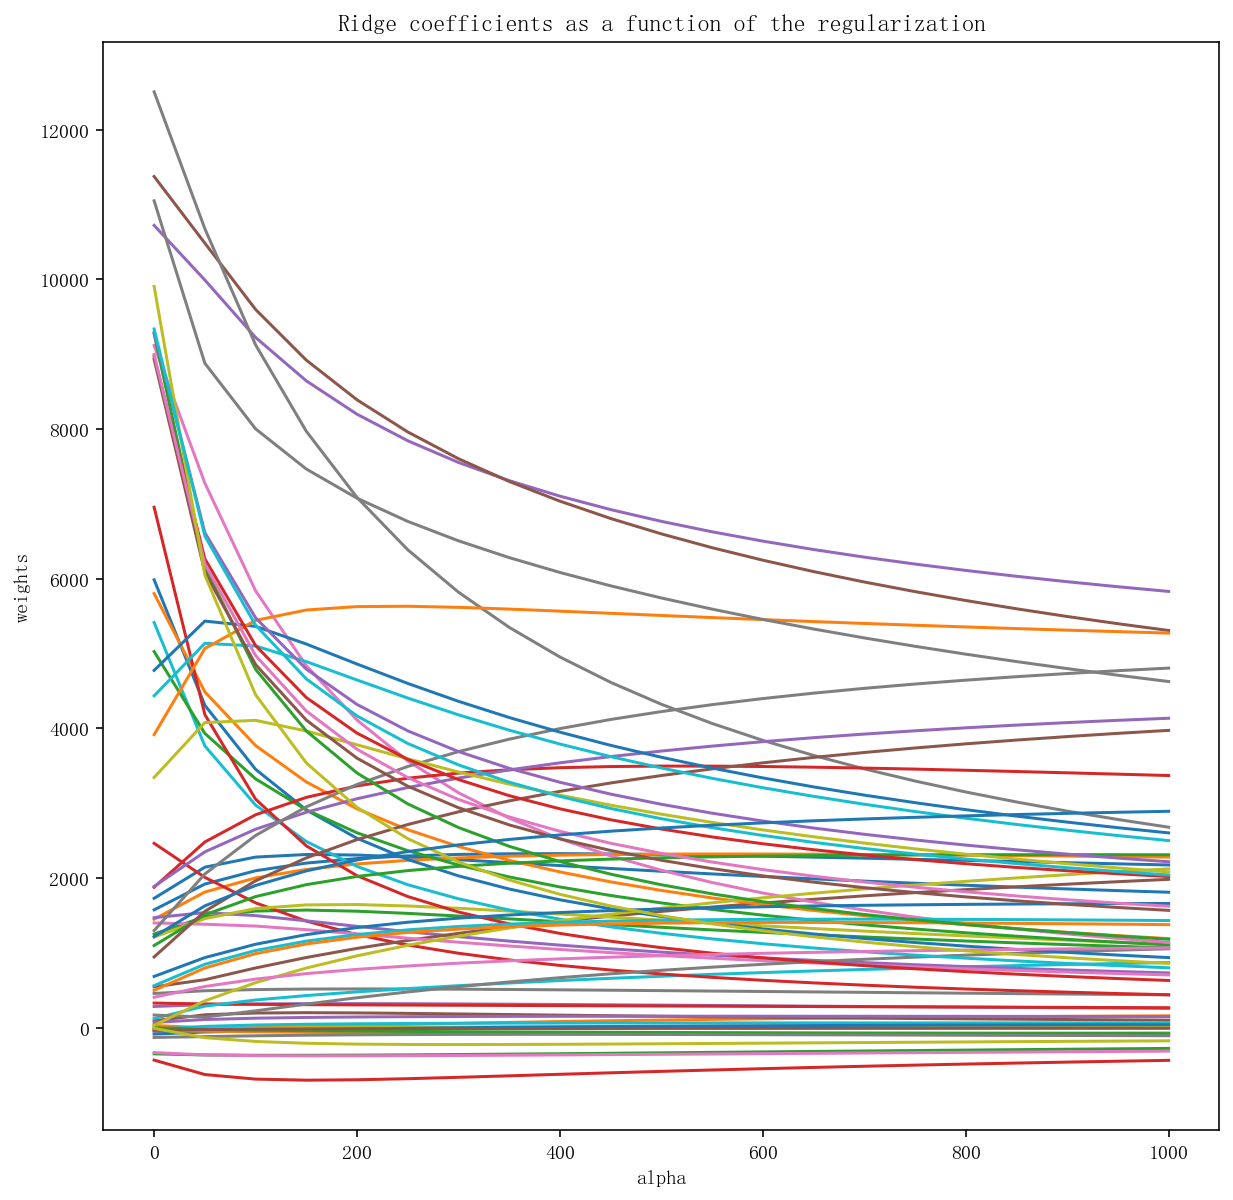

In [362]:
alphas = np.linspace(0, 1000, 21)
clf = Ridge(fit_intercept=False)

coefs = []
# intercepts = []   # 存放截距项
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_stand, Y)
    coefs.append(clf.coef_)
coefs = np.array(coefs)
plt.figure(figsize=(10,10))
plt.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')

In [364]:
# 将不同alpha对应的系数存放到cf变量中
cf = pd.DataFrame(coefs, columns = X_stand.columns)
cf.insert(0, 'alpha', alphas)
cf.head(3)

,alpha,是否有收入_1,贡献榜总人数,贡献榜总金额,贡献榜平均用户等级,高等级用户数,高等级用户数占比,贵族数,金主数量,贡献榜人均金额,广泛贡献用户数,守护者个数,视频平均时长,视频平均每周更新频率,视频平均点赞数,视频平均评论数,视频平均分享数,视频平均观看次数,个人等级,主播等级,英雄个数,公会概况_白金中规模公会,公会概况_白金小规模公会,公会概况_钻石中规模公会,公会概况_钻石大规模公会,公会概况_钻石小规模公会,英雄概况_热门上单,英雄概况_热门下路,英雄概况_热门打野,英雄概况_热门辅助,英雄概况_非热门上单,英雄概况_非热门下路,英雄概况_非热门中单,英雄概况_非热门打野,英雄概况_非热门辅助,标签_上电视,标签_大神推荐,标签_超粉之星,标签_魅力新星,直播标题主题_高段开黑,公告主题_新人求订阅,公告主题_时段&粉丝机制,公告主题_能力描述,"直播时长_分箱_(2, 6]","直播时长_分箱_(6, 25]",活跃时间_黄金时段,是否蓝光_1,蓝光清晰度_4M以上,性别_1.0,订阅量_15-60,订阅量_60-700,订阅量_700以上,订阅量_未知,区域_东北,区域_华东,区域_华中,区域_华北,区域_华南,区域_未知,区域_海外,区域_西南,是否为前线城市_1.0
0,0.0,1730.533079,30.566049,-348.274518,-431.654739,284.991429,94.646256,-56.742128,458.661454,-19.028869,-19.512416,-84.033468,-34.297190,-0.516446,330.464223,71.542460,-34.754652,-331.367436,-129.122536,-7.739607,124.151706,1576.559733,1450.866417,1252.324808,2465.451094,1471.270379,546.953562,1401.328910,170.530580,1212.084617,5416.069996,5986.647396,5803.048382,5028.149963,6956.849956,10723.126107,11376.406498,9118.141795,12508.113257,32.553866,563.099586,686.443613,500.423316,1099.164913,1878.496438,1889.073259,947.042248,407.930689,1299.402485,3345.033945,4436.036877,4776.505265,3917.518447,9274.465004,8970.221950,9289.602638,8934.987242,8999.452198,11051.480340,9907.313398,9338.586700,1218.300030
1,50.0,2146.371633,0.101700,-363.027416,-624.586632,309.111199,173.727718,-42.055001,495.121889,-12.202832,19.042104,-56.414901,-45.876313,-21.180683,319.214181,110.697475,-23.799302,-362.594854,-117.540301,-131.630709,289.579704,1920.850663,1814.236052,1484.778619,2010.623845,1539.937602,642.407428,1383.968732,143.496571,1458.662607,3766.666961,4309.885687,4488.801161,3934.366718,4185.882489,9993.035781,10485.787670,7278.166281,10678.891968,360.128041,849.009109,938.312753,799.661294,1510.063454,2483.336195,2351.118328,1556.584880,551.840850,2055.174174,4078.740715,5138.273281,5435.003546,5067.991910,6157.713881,6267.378004,6616.851503,6089.338830,6199.687491,8880.807067,6049.947565,6572.328511,1629.455961
2,100.0,2281.188150,3.185335,-367.145767,-685.697387,319.099140,197.343660,-46.176142,510.786223,-5.714975,37.292896,-38.779482,-53.201656,-31.719496,313.382297,128.364326,-18.242914,-371.952487,-106.725548,-182.675731,371.536666,2098.746074,2002.919851,1560.108226,1669.938826,1498.729682,799.368973,1359.649704,226.591645,1593.145257,2975.673393,3454.423373,3771.631864,3326.549865,3055.476114,9225.415796,9599.746415,5840.143550,9126.687581,602.959821,1032.996980,1116.402551,990.947034,1753.360272,2846.604515,2653.415394,1964.083287,650.828231,2569.980735,4108.701047,5102.218143,5364.648679,5444.543394,4790.837701,5108.319996,5478.426361,4854.576132,4975.312394,8004.201021,4450.417668,5380.831564,1902.333976
